# **Proposta de Trabalho 1 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno 1:** Giovanna Paranhos
### **Matrícula 1:** 2023655467
### **Aluno 2:** Samir Saliba
### **Matrícula 2:** 2022685118


### **Tema:** Subtipos de Câncer de Cadela
### **Base de dados:** (link)


In [1]:
import os
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data_directory = 'data'
class_files = {
    'cs': 'cs.xls',
    'css': 'css.xls',
    'cmp': 'cmp.xls',
    'ctmsm': 'ctmsm.xls',
    'normal': 'normal.xls'
}

def read_data(args):
    class_name, file_path = args
    file_path = os.path.join(data_directory, file_path)
    data = pd.read_excel(file_path, index_col=0)
    data['label'] = class_name
    return data

dataframes = list(map(read_data, class_files.items()))
df = pd.concat(dataframes)

In [3]:
class_files = {
    'cs': 'cs.xls',
    'css': 'css.xls',
    'cmp': 'cmp.xls',
    'ctmsm': 'ctmsm.xls',
    'normal': 'normal.xls'
}

In [4]:
df.head(5)

,Cell Segment Area,Cell Segment Circularity,Cell Segment Coverage,Cell Segment Eccentricity,Cell Segment PL Angle SDI,Cell Segment PL Coherence,Cell Segment PL Entropy,Cell Segment PL Local Coherence,Cell Segment PL Mean,Cell Segment PL STD,...,Fibre Segment SHG Entropy,Fibre Segment SHG Local Coherence,Fibre Segment SHG Mean,Fibre Segment SHG STD,File,Mean Fibre Length,Mean Fibre Waviness,No. Cells,No. Fibres,label
0,195098.485169,0.158102,0.778069,0.404162,0.042165,0.016293,11.104359,0.615069,303.300807,224.355479,...,10.291135,0.530473,223.997048,245.718561,cs-E07-14-2-c2,28.575772,0.924062,5,331,cs
1,60607.604087,0.181570,0.629284,0.791257,0.009826,0.048164,10.868720,0.616854,306.037798,297.804224,...,10.083314,0.564153,300.150079,178.365447,cs-E001-16-1-c1,29.841778,0.928932,16,524,cs
2,20641.322504,0.358274,0.632511,0.722076,0.011377,0.035508,10.421477,0.608176,268.334256,296.809198,...,10.503100,0.567172,341.633427,247.647255,cs-E001-16-1-c2,30.129695,0.914342,30,470,cs
3,51121.281171,0.231883,0.661697,0.820954,0.009524,0.016777,10.208917,0.606438,214.151728,259.056899,...,10.417998,0.569829,361.217089,290.894578,cs-E001-16-1-c3,24.697342,0.937733,24,524,cs
4,10176.145501,0.318681,0.565228,0.759459,0.015223,0.022193,10.226595,0.596874,225.823461,204.287546,...,9.761461,0.539539,289.478569,142.085471,cs-E001-16-1-c4,30.501308,0.943563,34,476,cs


# 2. Data understanding (Entendimento dos dados)


In [5]:
print(f"Classes: {df.label.unique()}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Classes: ['cs' 'css' 'cmp' 'ctmsm' 'normal']
Number of Rows: 1384
Number of Columns: 31

Data Types:
Cell Segment Area                    float64
Cell Segment Circularity             float64
Cell Segment Coverage                float64
Cell Segment Eccentricity            float64
Cell Segment PL Angle SDI            float64
Cell Segment PL Coherence            float64
Cell Segment PL Entropy              float64
Cell Segment PL Local Coherence      float64
Cell Segment PL Mean                 float64
Cell Segment PL STD                  float64
Fibre Angle SDI                      float64
Fibre Network Connectivity           float64
Fibre Network Cross-Link Density     float64
Fibre Network Degree                 float64
Fibre Network Eigenvalue             float64
Fibre Segment Area                   float64
Fibre Segment Circularity            float64
Fibre Segment Coverage               float64
Fibre Segment Eccentricity           float64
Fibre Segment SHG Angle SDI          float64

**Observação**: 29 colunas, excluindo label e file. Não há nulos nas colunas, o que é um ótimo sinal.

In [6]:
df = df.drop(columns=['File'])
features = df.columns[:-1]

In [7]:
pd.merge(
    df['label'].value_counts(), 
    df['label'].value_counts(normalize=True), 
    right_index=True, 
    left_index=True
)

,count,proportion
label,,
cmp,438,0.316474
cs,347,0.250723
ctmsm,290,0.209538
normal,166,0.119942
css,143,0.103324


**Observação:** Percebe-se que algumas classes estão menos representadas que outras, embora não seja em uma escala tão discrepante. Entretanto, no treino de algoritmos de classificação, por exemplo, isso deve ser considerado - principalmente no cálculo do erro e nas métricas de avaliação.

In [8]:
print("\nSummary Statistics:")
describe_statistics_df = df.describe().T 
display(describe_statistics_df)


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Cell Segment Area,1384.0,92173.085126,52119.539336,3387.853887,49359.776601,85962.073574,128892.458764,231366.075190
Cell Segment Circularity,1384.0,0.192294,0.107248,0.039037,0.119402,0.160753,0.232335,0.735709
Cell Segment Coverage,1384.0,0.645408,0.116908,0.164467,0.573394,0.656033,0.727600,0.912773
Cell Segment Eccentricity,1384.0,0.737752,0.151025,0.050064,0.676414,0.779127,0.844460,0.969457
Cell Segment PL Angle SDI,1384.0,0.013026,0.007428,0.005266,0.008421,0.010990,0.014838,0.072281
Cell Segment PL Coherence,1384.0,0.041293,0.038340,0.000225,0.015839,0.030862,0.054192,0.303444
Cell Segment PL Entropy,1384.0,9.604717,0.957069,5.117719,9.060633,9.723813,10.266942,11.850455
Cell Segment PL Local Coherence,1384.0,0.579517,0.038475,0.471175,0.550180,0.580065,0.608103,0.674477
Cell Segment PL Mean,1384.0,163.482274,103.375915,17.539965,90.435423,142.721009,208.059891,812.646481
Cell Segment PL STD,1384.0,179.881935,108.907413,23.414846,101.879994,155.715498,224.047704,916.573882


In [9]:
describe_statistics_df["%_dist_mean_median"] = (
    100 * (describe_statistics_df["mean"] - describe_statistics_df["50%"])
    / describe_statistics_df["50%"]
)

display(describe_statistics_df[["mean", "50%", "%_dist_mean_median"]])

,mean,50%,%_dist_mean_median
Cell Segment Area,92173.085126,85962.073574,7.225293
Cell Segment Circularity,0.192294,0.160753,19.621091
Cell Segment Coverage,0.645408,0.656033,-1.619463
Cell Segment Eccentricity,0.737752,0.779127,-5.310410
Cell Segment PL Angle SDI,0.013026,0.010990,18.524034
Cell Segment PL Coherence,0.041293,0.030862,33.798855
Cell Segment PL Entropy,9.604717,9.723813,-1.224796
Cell Segment PL Local Coherence,0.579517,0.580065,-0.094488
Cell Segment PL Mean,163.482274,142.721009,14.546748
Cell Segment PL STD,179.881935,155.715498,15.519610


**Observação:** Há uma grande diferença na escala entre as colunas, portanto será adequado realizar a normalização dos dados antes da modelagem. Além disso, a média e a mediana das colunas estão próximas, o que facilita a normalização (i.e. não há um grande outlier deturpando fortemente a média).

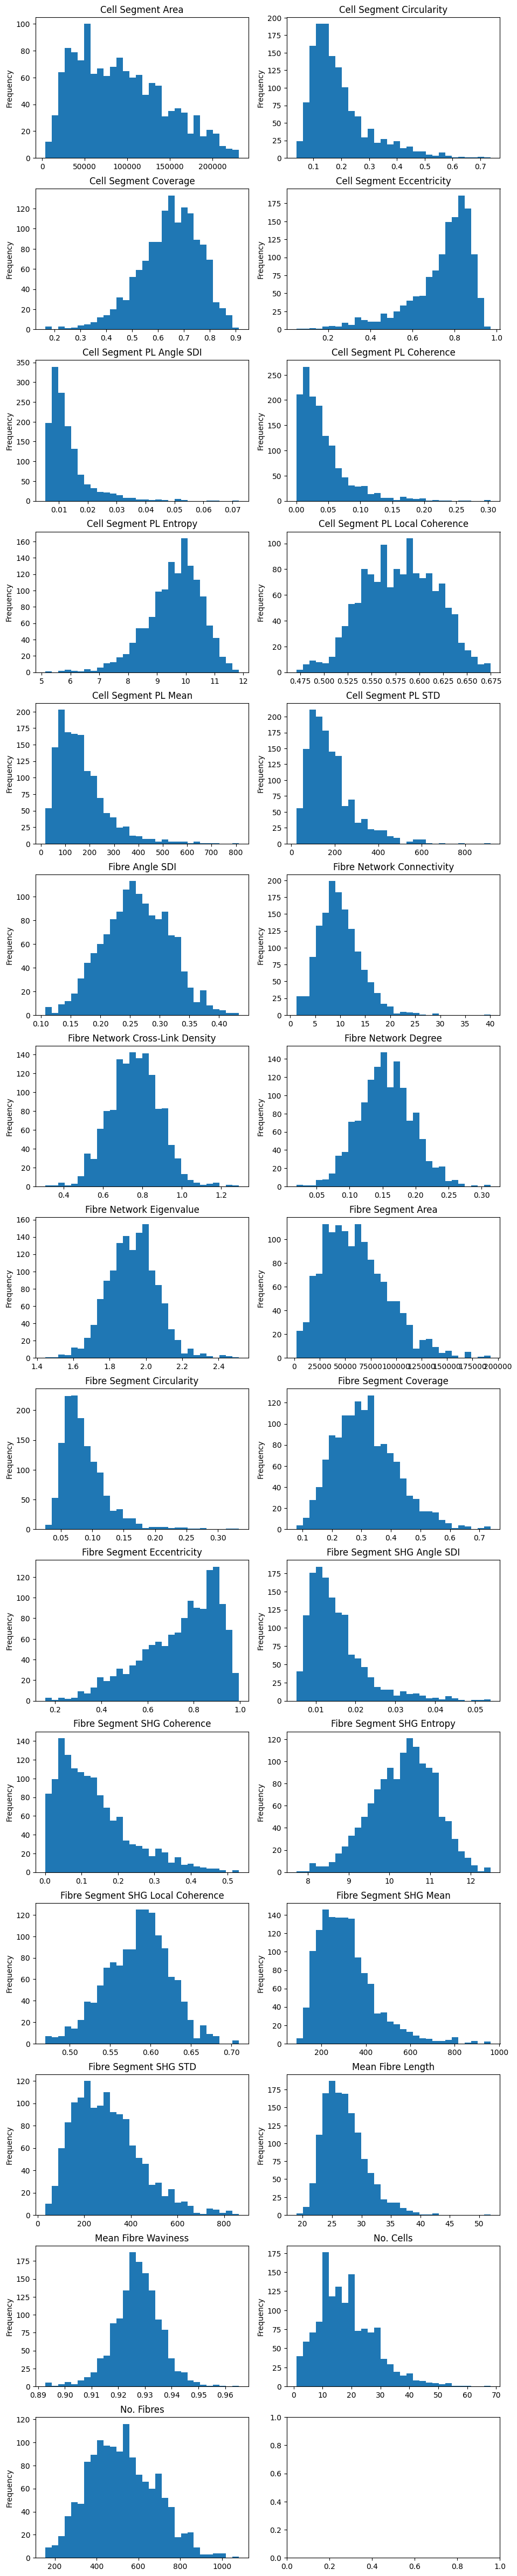

In [10]:
row_n, col_m = (15, 2)
adjust_w, adjust_h = (1, 1/2)
default_w, default_h = (4.8, 6.4)
figsize = (col_m*default_w*adjust_w, row_n*default_h*adjust_h)

fig, axs = plt.subplots(row_n, col_m, figsize=figsize)
fig.tight_layout(pad=2.0)

for (i, col_name) in enumerate(features):
    row, col = i//col_m, i%col_m
    ax = axs[row][col]
    ax.title.set_text(col_name)
    df[col_name].plot(kind='hist', bins=30, ax=ax)


plt.savefig('imgs/features_histograms.png',  bbox_inches='tight')

**Observação:** Algumas features seguem uma distribuição normal ou semelhante à normal com uma distorção (skew) em relação à média, como No.Fibres, Fibre Segment SHG STD, Fibre Segment ircularity. Outras features, entretanto, apresentam distribuições mais caóticas, como Segment Cell Area. 

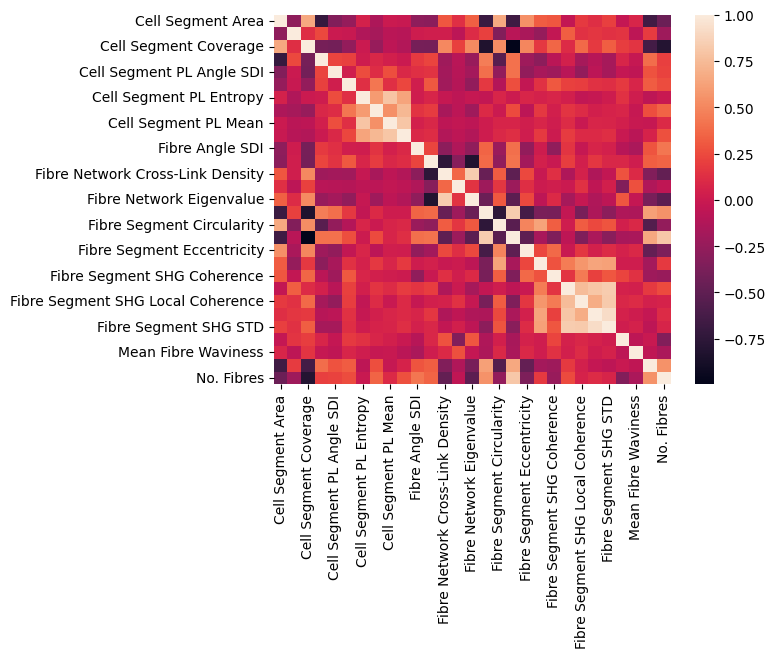

In [11]:
features_corr = df[features].corr() 
sns.heatmap(features_corr)
plt.savefig('imgs/corr_map.png', bbox_inches='tight')

In [12]:
melt_corr = features_corr.melt(ignore_index=False).reset_index()
melt_corr = melt_corr[melt_corr.value != 1]

group = melt_corr[['index', 'variable']].agg(frozenset, axis=1)

melt_corr_deduped = (
    melt_corr
    .groupby(group, as_index=False)
    .agg(**{c: (c, 'first') for c in melt_corr})
    .sort_values(by='value', key=abs, ascending=False)
    .set_index('index')
)
melt_corr_deduped.head(20)

/tmp/ipykernel_2546645/3009352156.py:7: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  melt_corr


,variable,value
index,,
Fibre Segment Coverage,Cell Segment Coverage,-0.995663
Fibre Segment SHG STD,Fibre Segment SHG Mean,0.914432
Fibre Segment SHG STD,Fibre Segment SHG Entropy,0.833827
Fibre Network Eigenvalue,Fibre Network Cross-Link Density,0.833320
Fibre Segment Coverage,Fibre Segment Area,0.832870
Fibre Segment Area,Cell Segment Coverage,-0.824637
Fibre Segment SHG STD,Fibre Segment SHG Local Coherence,0.821057
Fibre Network Eigenvalue,Fibre Network Connectivity,-0.817921
No. Fibres,Fibre Segment Coverage,0.807058


**Observação:** Observa-se também que há várias features altamente correlacionadas (positivamente ou negativamente). Para algoritmos de classificação, isso deve ser tratado, pois vários algoritmos são sensíveis à features correlacionadas e o uso de todas as features não trará informações adicionais (ou apenas muito poucas), mas aumentará a complexidade do modelo, aumentando assim o sobreajuste e o risco de erros.

Na mineração de padrões, essas relações provavelmente vão estar representadas nos grupos frequentes e regras de associação.

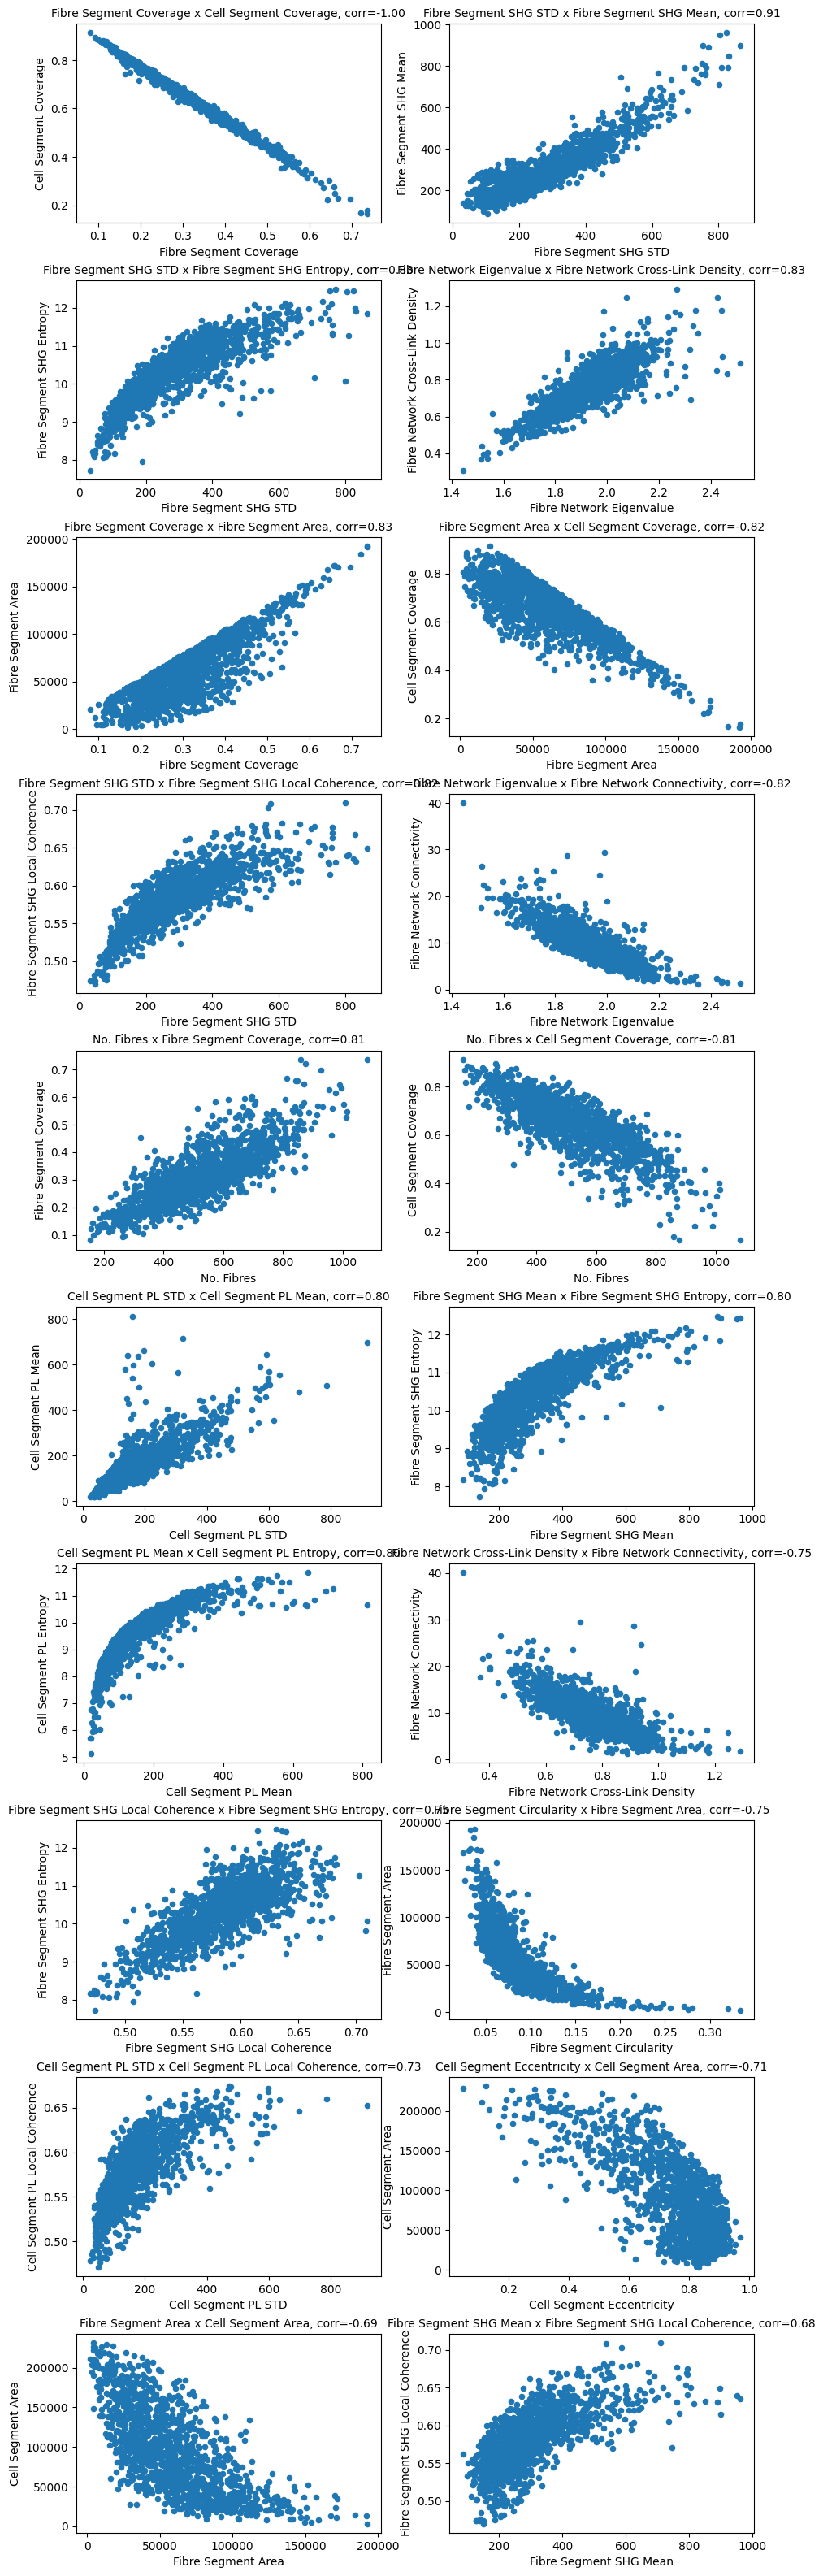

In [13]:
row_n, col_m = (10, 2)
adjust_w, adjust_h = (1, 1/2)
default_w, default_h = (4.8, 6.4)
figsize = (col_m*default_w*adjust_w, row_n*default_h*adjust_h)

fig, axs = plt.subplots(row_n, col_m, figsize=figsize)
fig.tight_layout(pad=3.0)

iterable_correlation = melt_corr_deduped.reset_index().head(20).values

for (i, (feature1, feature2, corr)) in enumerate(iterable_correlation):
    row, col = i//col_m, i%col_m
    ax = axs[row][col]
    ax.title.set_text(f'{feature1} x {feature2}, corr={corr:.2f}')
    ax.title.set_size(10)
    df.plot(kind='scatter', x=feature1, y=feature2, ax=ax)

plt.savefig('imgs/features_pairplots.png',  bbox_inches='tight')

# 3. Data preparation (Preparação dos dados)

In [14]:
scaler = StandardScaler()
scaled_df = df.copy()
scaled_df[features] = scaler.fit_transform(scaled_df[features])

In [15]:
print("\nSummary Statistics:")

pd.set_option('display.float_format', lambda x: '%.3f' % x)
display(scaled_df.describe().T)


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Cell Segment Area,1384.000,0.000,1.000,-1.704,-0.822,-0.119,0.705,2.672
Cell Segment Circularity,1384.000,-0.000,1.000,-1.430,-0.680,-0.294,0.373,5.069
Cell Segment Coverage,1384.000,-0.000,1.000,-4.115,-0.616,0.091,0.703,2.288
Cell Segment Eccentricity,1384.000,-0.000,1.000,-4.555,-0.406,0.274,0.707,1.535
Cell Segment PL Angle SDI,1384.000,-0.000,1.000,-1.045,-0.620,-0.274,0.244,7.980
Cell Segment PL Coherence,1384.000,-0.000,1.000,-1.072,-0.664,-0.272,0.337,6.840
Cell Segment PL Entropy,1384.000,-0.000,1.000,-4.690,-0.569,0.124,0.692,2.347
Cell Segment PL Local Coherence,1384.000,-0.000,1.000,-2.817,-0.763,0.014,0.743,2.469
Cell Segment PL Mean,1384.000,-0.000,1.000,-1.412,-0.707,-0.201,0.431,6.282
Cell Segment PL STD,1384.000,0.000,1.000,-1.437,-0.716,-0.222,0.406,6.767


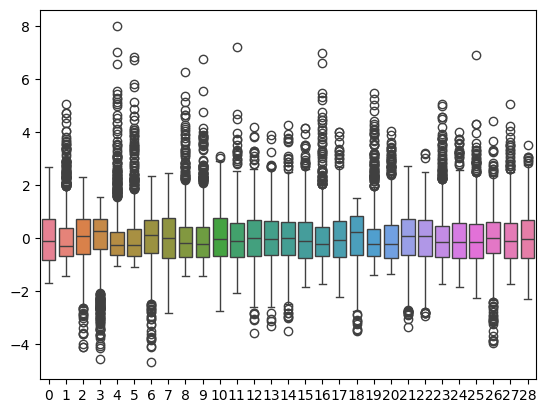

In [16]:
box_plot = sns.boxplot(data=scaled_df)
labels = list(range(len(features)))
_ = box_plot.set_xticks(ticks=labels, labels=labels)

plt.savefig('imgs/features_scaled_boxplots.png',  bbox_inches='tight')

**Observação:** É possível observar que a normalização dos dados foi bem sucedida, tendo em vista que as escalas estão bem representadas e os outliers, embora sejam frequentes em diversas features, não alteraram drasticamente a escala dos dados. Se houvessem outliers muito discrepantes nos dados originais, ficaria evidente a diferença na escala entre as features normalizadas, pois sua representação no gráfico acima exigiria uma escala muito maior mo eixo Y o que tornaria os outros boxplots "achatados".

# 4. Modeling (Modelagem)

In [17]:
discrete_df = scaled_df.copy()
for col in features:
    discrete_df[col] = pd.qcut(scaled_df[col], q=4, labels=['q1', 'q2', 'q3', 'q4'])

discrete_df.head(5)

,Cell Segment Area,Cell Segment Circularity,Cell Segment Coverage,Cell Segment Eccentricity,Cell Segment PL Angle SDI,Cell Segment PL Coherence,Cell Segment PL Entropy,Cell Segment PL Local Coherence,Cell Segment PL Mean,Cell Segment PL STD,...,Fibre Segment SHG Coherence,Fibre Segment SHG Entropy,Fibre Segment SHG Local Coherence,Fibre Segment SHG Mean,Fibre Segment SHG STD,Mean Fibre Length,Mean Fibre Waviness,No. Cells,No. Fibres,label
0,q4,q2,q4,q1,q4,q2,q4,q4,q4,q4,...,q1,q2,q1,q2,q2,q3,q2,q1,q1,cs
1,q2,q3,q2,q3,q2,q3,q4,q4,q4,q4,...,q1,q2,q2,q3,q1,q4,q3,q2,q3,cs
2,q1,q4,q2,q2,q3,q3,q4,q4,q4,q4,...,q2,q3,q2,q3,q2,q4,q1,q4,q2,cs
3,q2,q3,q3,q3,q2,q2,q3,q3,q4,q4,...,q1,q3,q2,q3,q3,q2,q4,q3,q3,cs
4,q1,q4,q1,q2,q4,q2,q3,q3,q4,q3,...,q1,q1,q1,q2,q1,q4,q4,q4,q2,cs


In [18]:
data_encoded = pd.get_dummies(discrete_df, columns=features)
data_encoded.head(5)

,label,Cell Segment Area_q1,Cell Segment Area_q2,Cell Segment Area_q3,Cell Segment Area_q4,Cell Segment Circularity_q1,Cell Segment Circularity_q2,Cell Segment Circularity_q3,Cell Segment Circularity_q4,Cell Segment Coverage_q1,...,Mean Fibre Waviness_q3,Mean Fibre Waviness_q4,No. Cells_q1,No. Cells_q2,No. Cells_q3,No. Cells_q4,No. Fibres_q1,No. Fibres_q2,No. Fibres_q3,No. Fibres_q4
0,cs,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,cs,False,True,False,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
2,cs,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
3,cs,False,True,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
4,cs,True,False,False,False,False,False,False,True,True,...,False,True,False,False,False,True,False,True,False,False


In [19]:
frequent_itemsets_per_class = {}
min_support = 0.2

In [20]:
for class_name in class_files.keys():
    print(f"Frequent Itemsets for {class_name}:")
    data = data_encoded[data_encoded.label == class_name].drop(columns='label')
    freq_itemsets_col = apriori(data, min_support=min_support, use_colnames=True) #MANUALLY FIXED DATAFRAME NAME
    print(freq_itemsets_col)
    frequent_itemsets_per_class[class_name] = freq_itemsets_col

Frequent Itemsets for cs:
     support                                           itemsets
0      0.236                             (Cell Segment Area_q2)
1      0.271                             (Cell Segment Area_q3)
2      0.323                             (Cell Segment Area_q4)
3      0.239                      (Cell Segment Circularity_q2)
4      0.288                      (Cell Segment Circularity_q3)
..       ...                                                ...
176    0.291  (Fibre Segment SHG Local Coherence_q1, Fibre S...
177    0.202  (No. Cells_q1, Fibre Segment Eccentricity_q4, ...
178    0.213  (Fibre Segment Eccentricity_q4, Cell Segment C...
179    0.277  (No. Cells_q1, Fibre Segment Coverage_q1, Cell...
180    0.207  (Fibre Segment SHG Local Coherence_q1, Fibre S...

[181 rows x 2 columns]
Frequent Itemsets for css:
     support                                           itemsets
0      0.315                             (Cell Segment Area_q1)
1      0.203               

In [21]:
association_rules_per_class = {}
min_confidence = 0.7

In [22]:
for class_name, freq_itemsets_class in frequent_itemsets_per_class.items():
    association_rules_df = association_rules(freq_itemsets_class, metric="confidence", min_threshold=min_confidence)
    print(f"\nAssociation Rules for {class_name}:")
    print(association_rules_df)
    association_rules_per_class[class_name] = association_rules_df 
    print('='*180)


Association Rules for cs:
                                           antecedents  \
0                               (Cell Segment Area_q4)   
1                               (Cell Segment Area_q4)   
2                               (Cell Segment Area_q4)   
3                               (Cell Segment Area_q4)   
4                           (Cell Segment Coverage_q3)   
..                                                 ...   
129  (Fibre Segment SHG Local Coherence_q1, Fibre S...   
130  (Fibre Segment SHG Entropy_q1, Fibre Segment S...   
131  (Fibre Segment SHG Local Coherence_q1, Fibre S...   
132  (Fibre Segment SHG Angle SDI_q1, Fibre Segment...   
133  (Fibre Segment SHG Entropy_q1, Fibre Segment S...   

                                           consequents  antecedent support  \
0                           (Cell Segment Coverage_q4)               0.323   
1                          (Fibre Segment Coverage_q1)               0.323   
2                                       (N

# 5. Evaluation (Validação)
